## Importing Library and File


In [1]:
import numpy as np
import pandas as pd

import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
sb.set()
import seaborn as sns

In [2]:
main_data=pd.read_csv("Video_Games.csv")

In [3]:
#printing the first few lines of dataset
main_data.head()

index                      Name Platform  Year_of_Release         Genre  \
0      0                Wii Sports      Wii           2006.0        Sports   
1      1         Super Mario Bros.      NES           1985.0      Platform   
2      2            Mario Kart Wii      Wii           2008.0        Racing   
3      3         Wii Sports Resort      Wii           2009.0        Sports   
4      4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0  Nintendo     41.36     28.96      3.77         8.45         82.53   
1  Nintendo     29.08      3.58      6.81         0.77         40.24   
2  Nintendo     15.68     12.76      3.79         3.29         35.52   
3  Nintendo     15.61     10.93      3.28         2.95         32.77   
4  Nintendo     11.27      8.89     10.22         1.00         31.37   

   Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0          76.0          51.0          8       322.0  Nintendo      E  
1           NaN           NaN        NaN         NaN       NaN    NaN  
2          82.0          73.0        8.3       709.0  Nintendo      E  
3          80.0          73.0          8       192.0  Nintendo      E  
4           NaN           NaN        NaN         NaN       NaN    NaN

In [4]:
print("Data type : ",type(main_data))
print("Data dims: ",main_data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims:  (16928, 17)


Our pre\-cleaned dataset contains 17 columns which are: 
Index, Name, Platform, Year\_of\_Release, Genre,Publisher, NA\_Sales, EU\_Sales, JP\_Sales, Other\_Sales, Global\_Sales, Critic\_Score, Critic\_Count, User\_Score, User\_Count, Developer, Rating

There was a total of 16928 rows. 



In [5]:
print(main_data.dtypes)

index                int64
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object


There are 9 Numeric Columns which are: NA\_Sales, EU\_Sales,JP\_Sales, Other\_Sales, Global\_Sales, Critic\_Score, Critic\_Count, User\_Score, User\_Count 

There are 8 Categorical Columns which are: Index, Name, Platform, Year\_of\_Release,Genre,Publisher, Developer, Rating


## DATA CLEANING

1. Removing Null Values
2. Outliers
3. Target Encoding 

In [6]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16655 non-null  float64
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       7718 non-null   float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(9

There are 16928 rows, in total but for columns like Name,Genre, Publisher,Critic_Score, Critic_Count, User_Score, User_Count, Developer, Rating and so on have lesser than 16928 non-null values, indicating presence of null values. Hence, we will be removing colums with null values.

### Removing Null Values

In [7]:
main_data=main_data.dropna()

In [8]:
main_data.isnull().sum()

index              0
Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [9]:
print("Data type : ",type(main_data))
print("Data dims: ",main_data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims:  (6938, 17)


In [10]:
main_data['User_Score'] = main_data['User_Score'].astype(object).astype(float)

After nulls values are removed, we have 17 columns and 6938 rows of data. The User_Score, though a numeric data has been recorded as an object, hence we converted the values to a float.

In [11]:
main_data.head()

index                   Name Platform  Year_of_Release     Genre Publisher  \
0      0             Wii Sports      Wii           2006.0    Sports  Nintendo   
2      2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
3      3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
6      6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
7      7               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
6     11.28      9.14      6.50         2.88         29.80          89.0   
7     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count  User_Score  User_Count Developer Rating  
0          51.0         8.0       322.0  Nintendo      E  
2          73.0         8.3       709.0  Nintendo      E  
3          73.0         8.0       192.0  Nintendo      E  
6          65.0         8.5       431.0  Nintendo      E  
7          41.0         6.6       129.0  Nintendo      E

In [12]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6938 entries, 0 to 16926
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            6938 non-null   int64  
 1   Name             6938 non-null   object 
 2   Platform         6938 non-null   object 
 3   Year_of_Release  6938 non-null   float64
 4   Genre            6938 non-null   object 
 5   Publisher        6938 non-null   object 
 6   NA_Sales         6938 non-null   float64
 7   EU_Sales         6938 non-null   float64
 8   JP_Sales         6938 non-null   float64
 9   Other_Sales      6938 non-null   float64
 10  Global_Sales     6938 non-null   float64
 11  Critic_Score     6938 non-null   float64
 12  Critic_Count     6938 non-null   float64
 13  User_Score       6938 non-null   float64
 14  User_Count       6938 non-null   float64
 15  Developer        6938 non-null   object 
 16  Rating           6938 non-null   object 
dtypes: float64(10), in

Here, we have an overview of the cleaned data, we currently have 6938 rows with Numeric Columns as intergers and float types and Categorical Columns as object types. 

### Outliers

<span style='font-size:small'>The code below, prints out the number of outliers per column.</span>  It only removes outliers from Numeric Column excluding Global\_Sales as we are using it as a predictor. The number of outliers per column is found by first computing the lower and upper quartile ranges and the interquartile range, r.  Then outliers are found using the IQR method. An outlier is defined as a value that is either:

Below q1 \- 1.5 \* r \(lower fence\)

Above q3 \+ 1.5 \* r \(upper fence\)

The total sum of outliers per column is then printed. 



In [13]:
for column in main_data.columns:
    if column != 'Name' and column != 'Year_of_Release' and column != 'Global_Sales':
        # Check if the column contains numeric data
        if pd.api.types.is_numeric_dtype(main_data[column]):
            q1 = main_data[column].quantile(0.25)
            q3 = main_data[column].quantile(0.75)
            r = q3 - q1
            print("Number of outliers of", column, ":")
            print(((main_data[column] < (q1 - 1.5 * r)) | (main_data[column] > (q3 + 1.5 * r))).sum())
            print() 

Number of outliers of index :
0

Number of outliers of NA_Sales :
686

Number of outliers of EU_Sales :
771

Number of outliers of JP_Sales :
1516

Number of outliers of Other_Sales :
799

Number of outliers of Critic_Score :
100

Number of outliers of Critic_Count :
176

Number of outliers of User_Score :
268

Number of outliers of User_Count :
1006



It is found by that the JP\_Sales \(Japan Sales\) and User\_Counts have excessive outliers hence, these columns have been dropped from the dataset to improve accuracy of prediction.



In [14]:
main_data=main_data.drop(columns=['JP_Sales','User_Count'])

The outliers functions detects the number of outliers with the IQR formula. The remove function removes rows from the DataFrame based on the list of indices.

The while loop uses these functions and removes the outliers from numeric columns.

In [15]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

# Iteratively remove outliers until none are left in any column
while True:
    index_list = []
    for column in main_data.columns:
        if main_data[column].dtype != object and column != 'Name' and column != 'index' and column != 'Year_of_Release':
            index_list.extend(outliers(main_data, column))
    if len(index_list) == 0:
        break
    main_data = remove(main_data, index_list)

print("Outliers removed successfully.")

Outliers removed successfully.


In [16]:
main_data.shape

(3186, 15)

In [17]:
for column in main_data.columns:
    if column != 'Name' and column != 'Year_of_Release' and column != 'Global_Sales':
        # Check if the column contains numeric data
        if pd.api.types.is_numeric_dtype(main_data[column]):
            Q1=main_data[column].quantile(0.25)
            Q3=main_data[column].quantile(0.75)
            IQR=Q3-Q1
            lower_bound=Q1-1.5*IQR
            upper_bound=Q3+1.5*IQR
            print("Number of outliers of", column, ":")
            print(((main_data[column] < (lower_bound)) | (main_data[column] > (upper_bound))).sum())
            print()  # Add a newline for better formatting

Number of outliers of index :
0

Number of outliers of NA_Sales :
0

Number of outliers of EU_Sales :
0

Number of outliers of Other_Sales :
0

Number of outliers of Critic_Score :
0

Number of outliers of Critic_Count :
0

Number of outliers of User_Score :
0



After removing outliers, we have 15 columns with 7 Numeric Columns and 8 Categorical Columns. There is a total of 3186 rows of data. The data set is cleaned!


<span style='font-size:large'>**Target Encoding**</span>

<span style='font-size:small'>Since we will be using regression models, we would need numeric inputs, however, we have Categorical Columns hence we used target encoding a method for handling categorical variables by replacing them with a number that represents the mean target value for each category in this case the mean global sale for each category. We did target encoding for Platform, Genre, Publisher, Developer, Rating </span>



In [18]:
for column in main_data.columns:
    if main_data[column].dtype == object and column != 'Name' and column != 'index':
        mean_column = main_data.groupby(column)['Global_Sales'].mean()  #This line groups the DataFrame by the current column and calculates the mean of 'Global_Sales'for each column
        main_data[f'mean_{column}'] = main_data[column].map(mean_column) #This line creates a new column in DataFrame and maps each category in the original column to its corresponding mean sales value

In [19]:
for column in main_data.columns:
    if main_data[column].dtype == object and column != 'Name' and column != 'index':
        mean_column = main_data.groupby(column)['Global_Sales'].mean()
        print(f"Mean of {column}: {mean_column}") #This line printes the mean sales for each category
        print()
        print()

Mean of Platform: Platform
3DS     0.167342
DC      0.160000
DS      0.136520
GBA     0.134574
GC      0.141435
PC      0.052138
PS      0.143061
PS2     0.152714
PS3     0.180270
PS4     0.094271
PSP     0.129953
PSV     0.144886
Wii     0.160289
WiiU    0.134103
X360    0.166431
XB      0.137429
XOne    0.119016
Name: Global_Sales, dtype: float64


Mean of Genre: Genre
Action          0.141645
Adventure       0.111928
Fighting        0.162034
Misc            0.160000
Platform        0.134270
Puzzle          0.100429
Racing          0.122934
Role-Playing    0.144383
Shooter         0.117278
Simulation      0.118077
Sports          0.151167
Strategy        0.090684
Name: Global_Sales, dtype: float64


Mean of Publisher: Publisher
10TACLE Studios           0.020000
1C Company                0.030000
2D Boy                    0.040000
3DO                       0.138000
505 Games                 0.099318
                            ...   
Zoo Digital Publishing    0.116667
Zoo Games      

In [20]:
main_data.head()

index                              Name Platform  Year_of_Release  \
4653   4653  Animal Crossing: Amiibo Festival     WiiU           2015.0   
4720   4720       Armored Core 2: Another Age      PS2           2001.0   
4751   4751         BlazBlue: Continuum Shift      PS3           2010.0   
4788   4788                    Battalion Wars       GC           2005.0   
4813   4813                  Ragnarok Odyssey      PSV           2012.0   

             Genre Publisher  NA_Sales  EU_Sales  Other_Sales  Global_Sales  \
4653          Misc  Nintendo      0.19      0.11         0.03          0.41   
4720    Simulation  Metro 3D      0.11      0.08         0.03          0.41   
4751      Fighting     PQube      0.21      0.07         0.04          0.41   
4788      Strategy  Nintendo      0.25      0.07         0.01          0.40   
4813  Role-Playing    GungHo      0.20      0.01         0.03          0.40   

      Critic_Score  Critic_Count  User_Score           Developer Rating  \
4653          46.0          20.0         4.4   Nintendo, Nd Cube      E   
4720          75.0          16.0         8.8       From Software      T   
4751          87.0          29.0         8.0    Arc System Works      T   
4788          76.0          43.0         8.8  Kuju Entertainment      T   
4813          66.0          21.0         7.8           Game Arts      T   

      mean_Platform  mean_Genre  mean_Publisher  mean_Developer  mean_Rating  
4653       0.134103    0.160000        0.207843        0.410000     0.136599  
4720       0.152714    0.118077        0.180000        0.162759     0.136858  
4751       0.180270    0.162034        0.130000        0.145357     0.136858  
4788       0.141435    0.090684        0.207843        0.176667     0.136858  
4813       0.144886    0.144383        0.176667        0.252857     0.136858

From the above column we can see that the categorical object inputs have become a numeric input, which are the mean of Global_Sales for each category. This is done for  mean\_Platform, mean\_Genre,mean\_Publisher, mean\_Developer and mean\_Rating.


In [21]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3186 entries, 4653 to 16753
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            3186 non-null   int64  
 1   Name             3186 non-null   object 
 2   Platform         3186 non-null   object 
 3   Year_of_Release  3186 non-null   float64
 4   Genre            3186 non-null   object 
 5   Publisher        3186 non-null   object 
 6   NA_Sales         3186 non-null   float64
 7   EU_Sales         3186 non-null   float64
 8   Other_Sales      3186 non-null   float64
 9   Global_Sales     3186 non-null   float64
 10  Critic_Score     3186 non-null   float64
 11  Critic_Count     3186 non-null   float64
 12  User_Score       3186 non-null   float64
 13  Developer        3186 non-null   object 
 14  Rating           3186 non-null   object 
 15  mean_Platform    3186 non-null   float64
 16  mean_Genre       3186 non-null   float64
 17  mean_Publisher 

In [25]:
# Define bins and labels for the categorization
bins = [1984, 1999, 2009, 2016, float('inf')]
labels = ['1985-1999', '2000-2009', '2010-2016', 'Post-2016']

# Categorize years using cut
main_data['Year_of_Release'] = pd.cut(main_data['Year_of_Release'], bins=bins, labels=labels, right=True)

# Check the result
main_data.head()

index                              Name Platform Year_of_Release  \
4653   4653  Animal Crossing: Amiibo Festival     WiiU       2010-2016   
4720   4720       Armored Core 2: Another Age      PS2       2000-2009   
4751   4751         BlazBlue: Continuum Shift      PS3       2010-2016   
4788   4788                    Battalion Wars       GC       2000-2009   
4813   4813                  Ragnarok Odyssey      PSV       2010-2016   

             Genre Publisher  NA_Sales  EU_Sales  Other_Sales  Global_Sales  \
4653          Misc  Nintendo      0.19      0.11         0.03          0.41   
4720    Simulation  Metro 3D      0.11      0.08         0.03          0.41   
4751      Fighting     PQube      0.21      0.07         0.04          0.41   
4788      Strategy  Nintendo      0.25      0.07         0.01          0.40   
4813  Role-Playing    GungHo      0.20      0.01         0.03          0.40   

      Critic_Score  Critic_Count  User_Score           Developer Rating  \
4653          46.0          20.0         4.4   Nintendo, Nd Cube      E   
4720          75.0          16.0         8.8       From Software      T   
4751          87.0          29.0         8.0    Arc System Works      T   
4788          76.0          43.0         8.8  Kuju Entertainment      T   
4813          66.0          21.0         7.8           Game Arts      T   

      mean_Platform  mean_Genre  mean_Publisher  mean_Developer  mean_Rating  
4653       0.134103    0.160000        0.207843        0.410000     0.136599  
4720       0.152714    0.118077        0.180000        0.162759     0.136858  
4751       0.180270    0.162034        0.130000        0.145357     0.136858  
4788       0.141435    0.090684        0.207843        0.176667     0.136858  
4813       0.144886    0.144383        0.176667        0.252857     0.136858

In [26]:
counts = main_data.groupby('Year_of_Release').size()
print(counts)

Year_of_Release
1985-1999      26
2000-2009    2277
2010-2016     883
Post-2016       0
dtype: int64


## Data Preparation (Splitting Train and Test data)

We split the train and test data yearwise. Data from 1985 to 2009 is used for training and data from 2010 to 2016 is used for testing. Training on earlier data and testing on later data allows the model to capture and adapt to long-term trends, seasonal variations, and shifts in patterns over time, and models can be used for time-series forecasting.

In [32]:
train_data = pd.DataFrame(columns=main_data.columns)
test_data = pd.DataFrame(columns=main_data.columns)

In [33]:
for index,row in main_data.iterrows():
    if (row['Year_of_Release']=='1985-1999' or row['Year_of_Release']=='2000-2009'):
        train_data = pd.concat([train_data, pd.DataFrame(row).T],ignore_index=True)
    else:
        test_data = pd.concat([test_data, pd.DataFrame(row).T],ignore_index=True)

In [34]:
print("Shape of train_data:", train_data.shape)
print("Shape of test_data:", test_data.shape)

Shape of train_data: (2303, 20)
Shape of test_data: (883, 20)


In [35]:
Numeric_Columns=['NA_Sales','EU_Sales','Other_Sales','Critic_Score','Critic_Count','User_Score']
Categorial_Columns=['mean_Platform','mean_Genre','mean_Publisher','mean_Developer','mean_Rating']

In [40]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import  StandardScaler
scaler=StandardScaler()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## Radial Basis function Network

RBF Network is a simple three layer feedforward neural network.The first layer corresponds to its inputs of the network, the second is hidden layer consisting of a number of RBF non-linear activation units, and the last corresponds to final output of the network

#### Activation functions in RBFs are implemented as Gaussian functions.
![image not found](RBF.jpg)

||X-Xi|| is the euclidean distance between X and Xi.The larger the distance, the smaller the value of RBF. Hence, an RBF with center Xi can be used to approximate the local characteristics of a nonlinear function close to Xi.

There will be multiple Gaussian curves and are weighted differently and we take the sum and get continuous function.To do this we need to know where Gaussian centers need to be placed.So we use K-means clustering in our input data to figure out where to place the Gaussians.

Activation of Hidden Neurons: When an input vector is presented, each hidden neuron computes the distance between the input vector and its center. It then applies the radial basis function to this distance. The output is a value that indicates how close the input is to the center of that neuron.

Output Computation: The outputs of the hidden layer neurons are then linearly combined in the output layer. The output layer typically has weights and biases that scale and shift the linear combination of hidden layer outputs to produce the final prediction.

#### Explanation of Function used:
fit - uses K-Means clusetering to initialize centre of radial basis functions. Then it computes RBF features based on the centres and trains Rigde regression model with RBF Features

predict - Predicts the target values for the given input data using trained RBFN Regressor

compute_rbf - Computes RBF features for input data based on the center

get_params - implements method to get parameters for RBFNRegressor

set_params - implements method to set parameters for RBFNRegressor

#### Hyperparameter Tuning:

param_grid - Specifies grid of hyperparameters to search and find the best parameters for n_centers, gamma, alpha

grid_search - Performs grid search with cross-validation and uses negative mean squared error as scoring metric

best_params - Retrives best hyperparameters found by grid search

best_rbfn - Instantiates new RBFNRegressor with best hyperparameters to scaled training data

y_test_pred - Make prediction on the scaled test data

In [44]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

class RBFNRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, n_centers=10, gamma=1.0, alpha=1.0): #initializes the RBFNRegressor with default values
        self.n_centers = n_centers
        self.gamma = gamma
        self.alpha = alpha    #alpha gives regularization strength for Ridge Regression
        self.centers = None
        self.linear_model = None

    def fit(self, X, y):
        #Fits the RBFNRegressor to training data
        # Step 1: Initialize centers using K-Means clustering
        kmeans = KMeans(n_clusters=self.n_centers, random_state=42)  # Ensure reproducibility
        kmeans.fit(X)
        self.centers = kmeans.cluster_centers_

        # Step 2: Compute radial basis functions
        rbf = self._compute_rbf(X)

        # Step 3: Train linear model with RBF features
        self.linear_model = Ridge(alpha=self.alpha)
        self.linear_model.fit(rbf, y)

    def predict(self, X): #predicts target value for given input data using trained RBFNRegressor
        rbf = self._compute_rbf(X)
        return self.linear_model.predict(rbf)

    def _compute_rbf(self, X): #computes RBF features for input data based on centre centres
        rbf = np.array([np.exp(-self.gamma * np.linalg.norm(x - c) ** 2)
                        for x in X for c in self.centers])
        return rbf.reshape(len(X), self.n_centers)
    
    def get_params(self, deep=True):
        return {'n_centers': self.n_centers, 'gamma': self.gamma, 'alpha': self.alpha}
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

### Numerical_Columns:

In [45]:
# preparing train and test dataset
X_train = train_data[Numeric_Columns]
X_test = test_data[Numeric_Columns]
y_train = train_data['Global_Sales']
y_test = test_data['Global_Sales']
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Hyperparameter tuning using GridSearchCV 
from sklearn.model_selection import GridSearchCV
# param_grid contains different values for n_centers,gamma, and alpha
param_grid = {
    'n_centers': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],  # Previous values for n_centers
    'gamma': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # More values for gamma
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]  # More values for alpha
}
rbfn = RBFNRegressor()
grid_search = GridSearchCV(rbfn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with best hyperparameters
best_rbfn = RBFNRegressor(**best_params)
best_rbfn.fit(X_train_scaled, y_train)

# Make predictions
y_test_pred = best_rbfn.predict(X_test_scaled)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:", test_mse)
print("R^2 Score:", r2_score(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

Best Hyperparameters: {'alpha': 0.0001, 'gamma': 0.001, 'n_centers': 40}


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Test MSE: 0.0022036566695957252
R^2 Score: 0.742811629781769
MAE: 0.025192976277781668


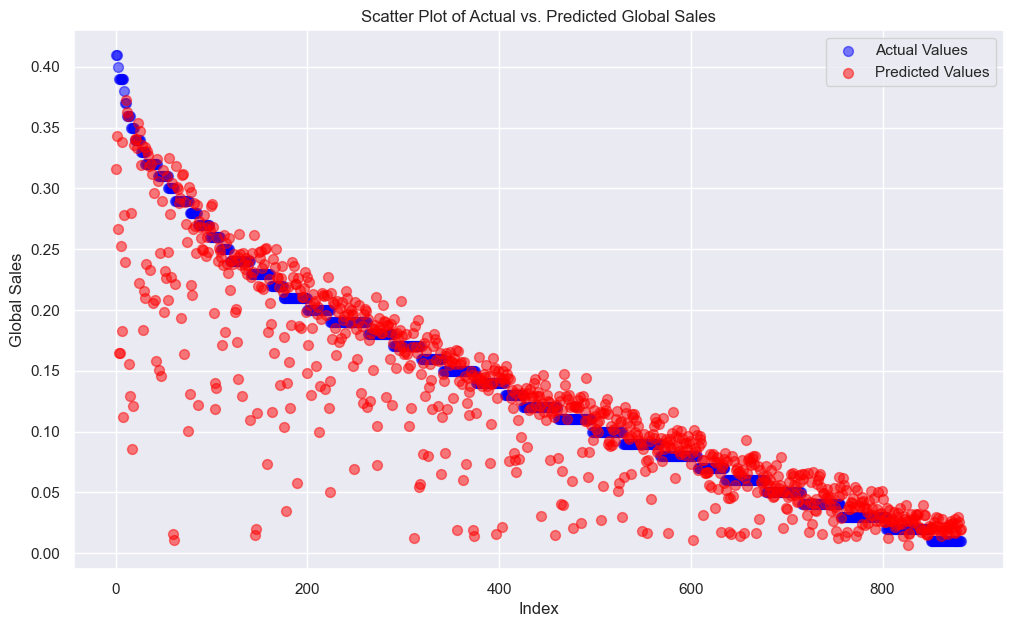

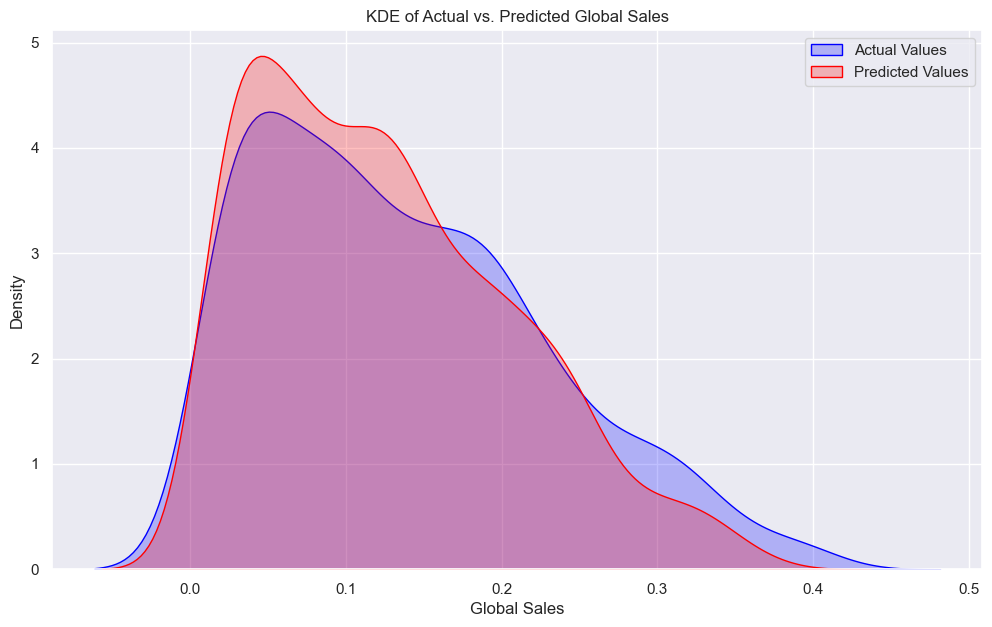

In [46]:
# Prepare the data
indices = range(len(y_test))  # Generating index values

# Create scatter plot for actual vs. predicted values
plt.figure(figsize=(12, 7))
plt.scatter(indices, y_test, color='blue', s=50, label='Actual Values', alpha=0.5)
plt.scatter(indices, y_test_pred, color='red', s=50, label='Predicted Values', alpha=0.5)
plt.title('Scatter Plot of Actual vs. Predicted Global Sales')
plt.xlabel('Index')
plt.ylabel('Global Sales')
plt.legend()
plt.grid(True)
plt.show()

# Set up the figure
plt.figure(figsize=(12, 7))

# Plot KDE for actual and predicted values
sns.kdeplot(y_test, label='Actual Values', color='blue', fill=True)
sns.kdeplot(y_test_pred, label='Predicted Values', color='red', fill=True)

# Add title and labels
plt.title('KDE of Actual vs. Predicted Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

### Categorical_Columns:

In [47]:
# preparing train and test dataset
X_train = train_data[Categorical_Columns]
X_test = test_data[Categorical_Columns]
y_train = train_data['Global_Sales']
y_test = test_data['Global_Sales']
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Hyperparameter tuning using GridSearchCV 
from sklearn.model_selection import GridSearchCV
# param_grid contains different values for n_centers,gamma, and alpha
param_grid = {
    'n_centers': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],  # Previous values for n_centers
    'gamma': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # More values for gamma
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]  # More values for alpha
}
rbfn = RBFNRegressor()
grid_search = GridSearchCV(rbfn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with best hyperparameters
best_rbfn = RBFNRegressor(**best_params)
best_rbfn.fit(X_train_scaled, y_train)

# Make predictions
y_test_pred = best_rbfn.predict(X_test_scaled)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:", test_mse)
print("R^2 Score:", r2_score(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

Best Hyperparameters: {'alpha': 0.0001, 'gamma': 0.001, 'n_centers': 30}


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Test MSE: 0.005907722580636701
R^2 Score: 0.3105107691325899
MAE: 0.05300455005331339


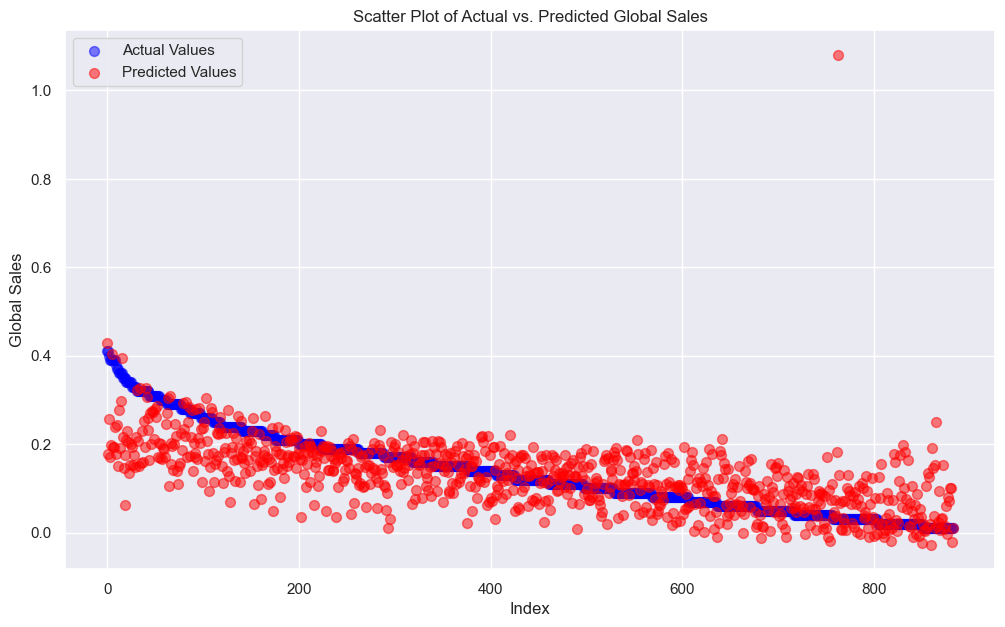

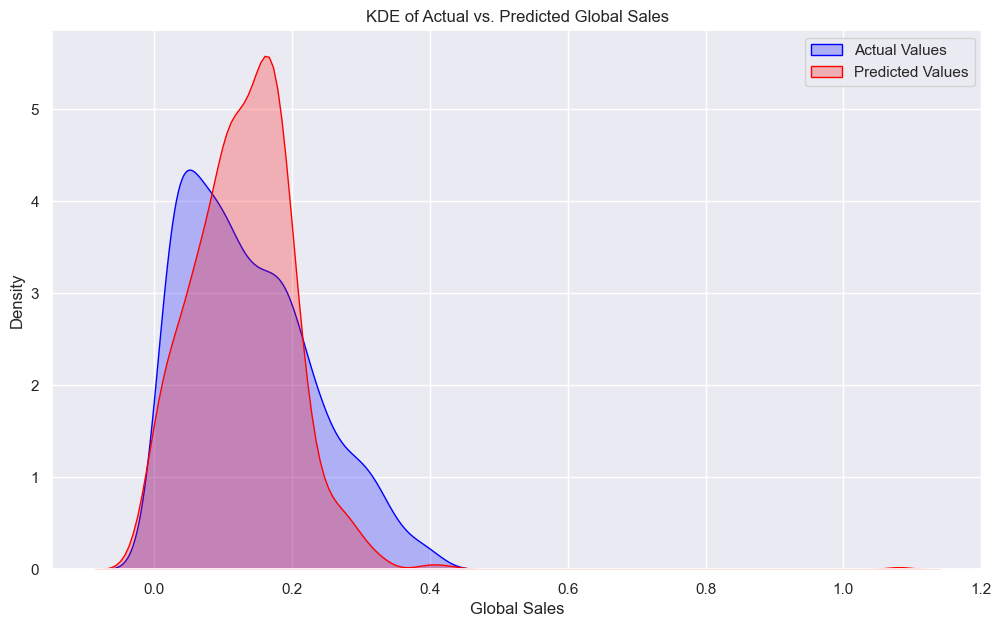

In [48]:
# Prepare the data
indices = range(len(y_test))  # Generating index values

# Create scatter plot for actual vs. predicted values
plt.figure(figsize=(12, 7))
plt.scatter(indices, y_test, color='blue', s=50, label='Actual Values', alpha=0.5)
plt.scatter(indices, y_test_pred, color='red', s=50, label='Predicted Values', alpha=0.5)
plt.title('Scatter Plot of Actual vs. Predicted Global Sales')
plt.xlabel('Index')
plt.ylabel('Global Sales')
plt.legend()
plt.grid(True)
plt.show()

# Set up the figure
plt.figure(figsize=(12, 7))

# Plot KDE for actual and predicted values
sns.kdeplot(y_test, label='Actual Values', color='blue', fill=True)
sns.kdeplot(y_test_pred, label='Predicted Values', color='red', fill=True)

# Add title and labels
plt.title('KDE of Actual vs. Predicted Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

### All_Columns

In [49]:
# preparing train and test dataset
X_train = train_data[Columns]
X_test = test_data[Columns]
y_train = train_data['Global_Sales']
y_test = test_data['Global_Sales']
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Hyperparameter tuning using GridSearchCV 
from sklearn.model_selection import GridSearchCV
# param_grid contains different values for n_centers,gamma, and alpha
param_grid = {
    'n_centers': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],  # Previous values for n_centers
    'gamma': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # More values for gamma
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]  # More values for alpha
}
rbfn = RBFNRegressor()
grid_search = GridSearchCV(rbfn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with best hyperparameters
best_rbfn = RBFNRegressor(**best_params)
best_rbfn.fit(X_train_scaled, y_train)

# Make predictions
y_test_pred = best_rbfn.predict(X_test_scaled)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:", test_mse)
print("R^2 Score:", r2_score(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

Best Hyperparameters: {'alpha': 0.0001, 'gamma': 0.001, 'n_centers': 60}


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Test MSE: 0.001976806785410951
R^2 Score: 0.7692872386198644
MAE: 0.02454337259726001


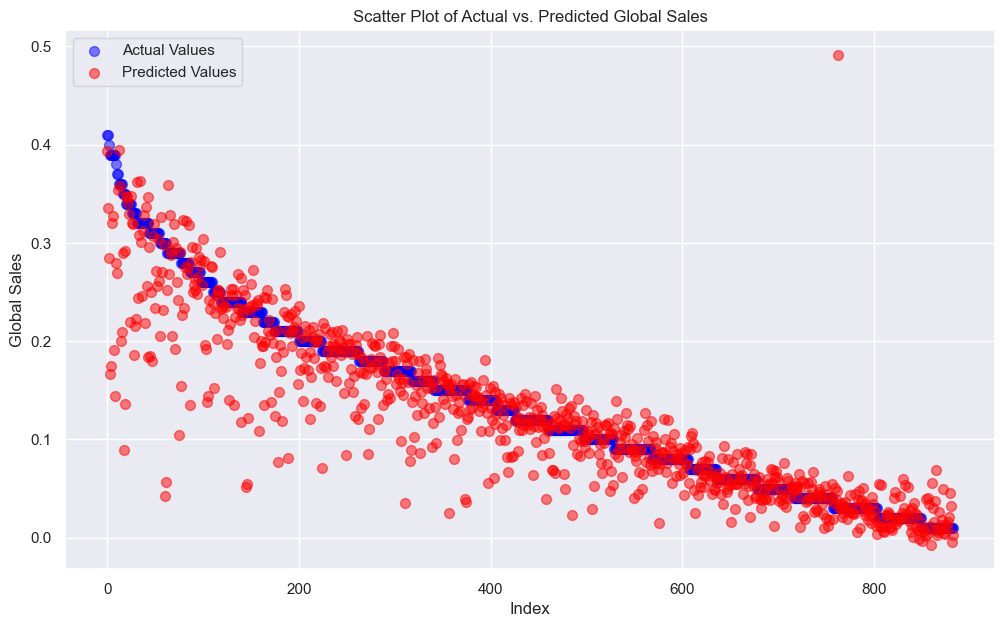

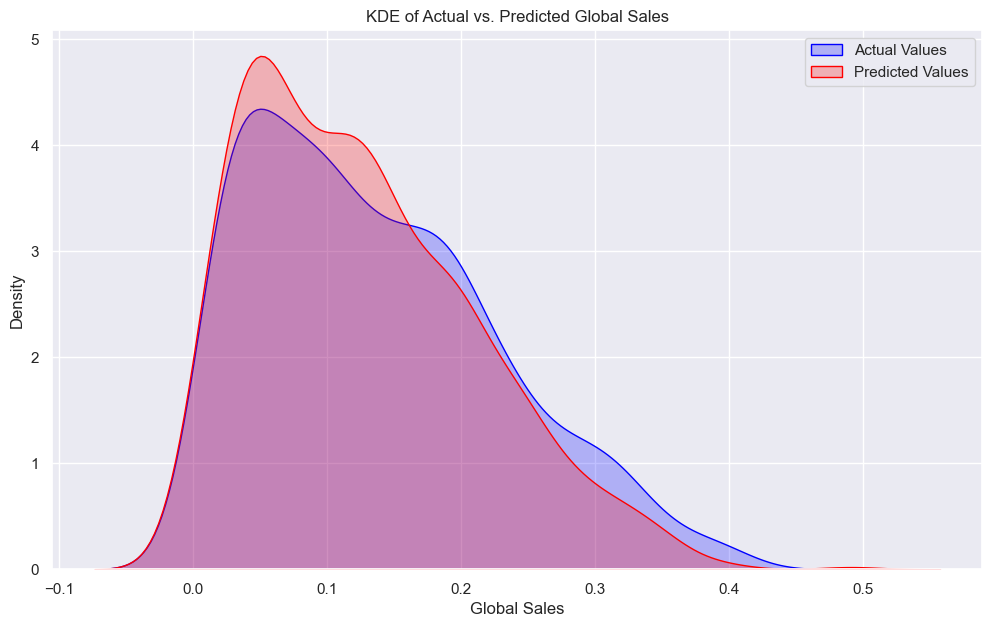

In [50]:
# Prepare the data
indices = range(len(y_test))  # Generating index values

# Create scatter plot for actual vs. predicted values
plt.figure(figsize=(12, 7))
plt.scatter(indices, y_test, color='blue', s=50, label='Actual Values', alpha=0.5)
plt.scatter(indices, y_test_pred, color='red', s=50, label='Predicted Values', alpha=0.5)
plt.title('Scatter Plot of Actual vs. Predicted Global Sales')
plt.xlabel('Index')
plt.ylabel('Global Sales')
plt.legend()
plt.grid(True)
plt.show()

# Set up the figure
plt.figure(figsize=(12, 7))

# Plot KDE for actual and predicted values
sns.kdeplot(y_test, label='Actual Values', color='blue', fill=True)
sns.kdeplot(y_test_pred, label='Predicted Values', color='red', fill=True)

# Add title and labels
plt.title('KDE of Actual vs. Predicted Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

#### Conclusion:
After predicting the the global sales using RBF Network we found that the MSE has slightly reduced and provided a better accuracy.